<a href="https://colab.research.google.com/github/meladush/HSE_NLP_Project_Terminology/blob/main/PROJECT_TERM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Предобработка коллекций текстов

In [ ]:
import re

from pymystem3 import Mystem
mystem = Mystem()

import nltk
from nltk.tokenize import word_tokenize
from nltk import download
download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.text import Text
from nltk.collocations import *

import os

!pip install pymorphy2
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
ru_stops = set(stopwords.words('russian') + ["это", "весь", 'который', 'нит', 'ниту', 'мисис', 'мочь', 'многий'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
raw = []
path = '/content/RUS/'
for file in sorted(os.listdir(path)):
  try:
    with open(path+file, encoding='UTF-8') as txt:
        text = txt.read()
        text = re.sub('\s+', ' ', text)
        text = text.lower()
        raw.append(text)
  except:
    pass

print(sorted(os.listdir(path)))
print(raw)
print(len(raw))

['01.txt', '02.txt', '03.txt', '04.txt', '05.txt', '06.txt', '07.txt', '08.txt', '09.txt', '10.txt', '11.txt', '12.txt', '13.txt', '14.txt', '15.txt', '16.txt', '17.txt', '18.txt', '19.txt', '20.txt']
['в университете мисис создали термостойкие композиты для авиационной и нефтегазовой отрасли исследователи ниту мисис представили новые жаропрочные композиты на основе алюминиевого сплава aa6063 для авиации и нефтегазовых комплексов. в отличие от обычных алюминиевых сплавов они способны работать при температурах свыше 300°c. благодаря механическому легированию ученые внедрили готовые алюминидные частицы в алюминий, что привело к повышению термостойкости разрабатываемых композитов. «созданный нами жаропрочный алюминиевый композит — перспективная разработка для применения в условиях, где температуры превышают 300°c. например, в тормозных системах, двигателях, турбинах и бурильных установках. предел прочности наших материалов при 300°c превышает 240 мпа, а при комнатной температуре составляе

In [ ]:
def normalize(text):

    list_of_lemmas = ' '.join([i for i in mystem.lemmatize(text) if i[0].isalpha()])
    tokens = re.findall('[а-яёa-z0-9]+', list_of_lemmas)
    normalized_text = [word for word in tokens if len(word) > 2 and word not in ru_stops]

    return ' '.join(normalized_text)

In [ ]:
# создаем список из текстов с частичной предобработкой
cleaned = []
for i in raw:
  cleaned.append(' '.join(([word for word in i.lower().split() if len(word) > 2 and word not in ru_stops])))

In [ ]:
# создаем список из текстов с предобработкой и лемматизацией
texts = [normalize(text) for text in raw]

In [ ]:
# предобработка английского текста
import spacy
spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
en_stops = stopwords.words('english') + ['misis', 'nitu']

In [ ]:
def normalize_en(text_eng):

  doc = nlp(text_eng)
  eng_words = [token.lemma_ for token in doc if token.lemma_ not in en_stops and token.lemma_[0].isalpha]
  eng_lemmas = []
  for token in doc:
    if str(token).isalpha() and str(token) not in en_stops:
      eng_lemmas.append(token.lemma_)

  return ' '.join(eng_lemmas)

In [ ]:
raw_en = []
path_en = '/content/ENG/'
for file in sorted(os.listdir(path_en)):
  try:
    with open(path_en + file, encoding='UTF-8') as txt:
      text = txt.read()
      text = re.sub('\s+', ' ', text.lower())
      raw_en.append(text)
  except:
    pass

print(len(raw_en))
print(sorted(os.listdir(path_en)))
print(raw_en)

20
['01-ru_ru-en_us-C.txt', '02-ru_ru-en_us-C.txt', '03-ru_ru-en_us-C.txt', '04-ru_ru-en_us-C.txt', '05-ru_ru-en_us-C.txt', '06-ru_ru-en_us-C.txt', '07-ru_ru-en_us-C.txt', '08-ru_ru-en_us-C.txt', '09-ru_ru-en_us-C.txt', '10-ru_ru-en_us-C.txt', '11-ru_ru-en_us-C.txt', '12-ru_ru-en_us-C.txt', '13-ru_ru-en_us-C.txt', '14-ru_ru-en_us-C.txt', '15-ru_ru-en_us-C.txt', '16-ru_ru-en_us-C.txt', '17-ru_ru-en_us-C.txt', '18-ru_ru-en_us-C.txt', '19-ru_ru-en_us-C.txt', '20-ru_ru-en_us-C.txt']
['misis university created heat-resistant composites for aviation and oil and gas industry researchers of nitu misis have presented new heat-resistant composites based on aluminum alloy aa6063 for aviation and oil and gas complexes. unlike conventional aluminum alloys, they are capable of operating at temperatures in excess of 300°c. through mechanical alloying, the scientists have embedded the finished aluminide particles into aluminum, resulting in improved thermal resistance of the composites under developme

In [ ]:
texts_en = [normalize_en(text) for text in raw_en]

## TF-IDF

In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1)) #ngram_range=(1, 1) означает униграммы, (1, 2) - униграммы и биграммы, (2, 2) - биграммы и т.д.
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

In [ ]:
def tfidfs(data):
    number_of_texts = len(data)
    tfidf_matrix = tfidf_vectorizer.fit_transform(data)
    npm_tfidf = tfidf_matrix.todense()
    list_of_doc_vectors = []
    for index in range(number_of_texts):
        document_vector = npm_tfidf[index]
        list_of_doc_vectors.append(document_vector.tolist())

    tfidfs_for_texts = []
    types = tfidf_vectorizer.get_feature_names_out()
    for index in range(number_of_texts):
        types_tfidf = [(types[ind], list_of_doc_vectors[index][0][ind]) for ind in range(len(types))]
        tfidfs_for_texts.append(types_tfidf)

    return tfidfs_for_texts

In [ ]:
print(tfidfs(texts)[3])

[('aa6063', 0.0), ('access', 0.0), ('acs', 0.0), ('airi', 0.0), ('al2o3', 0.0), ('al3ni', 0.0), ('analytical', 0.0), ('and', 0.0), ('applied', 0.04326690360133462), ('cells', 0.0), ('chemistry', 0.0), ('coatings', 0.0), ('crystals', 0.0), ('environmental', 0.0), ('fsme', 0.0492220138588034), ('fuel', 0.0), ('her2', 0.1476660415764102), ('hydrometallurgy', 0.0), ('ieee', 0.0), ('interfaces', 0.0), ('iphd', 0.0), ('journal', 0.0), ('k261', 0.0), ('letters', 0.0492220138588034), ('materials', 0.0), ('mda', 0.0492220138588034), ('metallography', 0.0), ('metals', 0.0), ('minerals', 0.0), ('mw2', 0.0), ('ni3al', 0.0), ('nial', 0.0), ('phd', 0.0), ('physics', 0.04326690360133462), ('pollution', 0.0), ('research', 0.0), ('results', 0.0), ('science', 0.0), ('situ', 0.0), ('skov3', 0.0492220138588034), ('solid', 0.0), ('surface', 0.0), ('tac', 0.0), ('technology', 0.0), ('the', 0.0), ('tialnb', 0.0), ('ticasicon', 0.0), ('tini', 0.0), ('u20', 0.0), ('vitro', 0.0), ('абразивный', 0.0), ('абсолютн

In [ ]:
def tfidfs_bigrams(data):
    number_of_texts = len(data)
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2))
    tfidf_matrix = tfidf_vectorizer.fit_transform(data)
    npm_tfidf = tfidf_matrix.todense()
    list_of_doc_vectors = []
    for index in range(number_of_texts):
        document_vector = npm_tfidf[index]
        list_of_doc_vectors.append(document_vector.tolist())

    tfidfs_for_texts = []
    types = tfidf_vectorizer.get_feature_names_out()
    for index in range(number_of_texts):
        types_tfidf = [(types[ind], list_of_doc_vectors[index][0][ind]) for ind in range(len(types))]
        tfidfs_for_texts.append(types_tfidf)

    return tfidfs_for_texts

In [ ]:
def tfidfs_trigrams(data):
    number_of_texts = len(data)
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(3, 3))
    tfidf_matrix = tfidf_vectorizer.fit_transform(data)
    npm_tfidf = tfidf_matrix.todense()
    list_of_doc_vectors = []
    for index in range(number_of_texts):
        document_vector = npm_tfidf[index]
        list_of_doc_vectors.append(document_vector.tolist())

    tfidfs_for_texts = []
    types = tfidf_vectorizer.get_feature_names_out()
    for index in range(number_of_texts):
        types_tfidf = [(types[ind], list_of_doc_vectors[index][0][ind]) for ind in range(len(types))]
        tfidfs_for_texts.append(types_tfidf)

    return tfidfs_for_texts

In [ ]:
def get_sorted_tfidfs(corpus):
  for i in range(len(corpus)):
    sorted_tfidfs = sorted(tfidfs(corpus)[i], key=lambda tup: tup[1], reverse=True)
    print(sorted_tfidfs[:15])

In [ ]:
def get_sorted_tfidfs_text(corpus):
  for i in range(len(corpus)):
    sorted_tfidfs = sorted(tfidfs(corpus)[i], key=lambda tup: tup[1], reverse=True)
    print(i, " ".join(word for (word, tfidf) in sorted_tfidfs[:15]))

In [ ]:
get_sorted_tfidfs(texts)

[('композит', 0.4281604165999597), ('алюминиевый', 0.28544027773330644), ('материал', 0.2042711745289554), ('температура', 0.1904040545550815), ('the', 0.1623636560164674), ('превышать', 0.1623636560164674), ('ультрамелкозернистый', 0.1623636560164674), ('сплав', 0.15250680881867273), ('жаропрочный', 0.14272013886665322), ('металлический', 0.14272013886665322), ('нефтегазовый', 0.14272013886665322), ('мпа', 0.1287828416470041), ('частица', 0.11797223405227661), ('создавать', 0.08949580734737567), ('приводить', 0.08439141968281326)]
[('квантовый', 0.7763384654784407), ('коммуникация', 0.17644056033600924), ('форум', 0.17644056033600924), ('технология', 0.16421884296246655), ('физика', 0.1411524482688074), ('сфера', 0.12407516258594892), ('инженерия', 0.11195863556832628), ('квант', 0.10586433620160556), ('цифровой', 0.10586433620160556), ('институт', 0.09488134988546777), ('бизнес', 0.09305637193946169), ('россия', 0.08035651525104598), ('безопасность', 0.07692024529737142), ('федерация

In [ ]:
# биграммы

In [ ]:
for i in range(len(texts)):
  sorted_tfidfs = sorted(tfidfs_bigrams(texts)[i], key=lambda tup: tup[1], reverse=True)
  print(sorted_tfidfs[:10])

[('алюминиевый сплав', 0.15775969276280055), ('лаборатория ультрамелкозернистый', 0.15775969276280055), ('ультрамелкозернистый металлический', 0.15775969276280055), ('металлический материал', 0.13867318469586476), ('aa6063 авиация', 0.07887984638140028), ('journal the', 0.07887984638140028), ('minerals получать', 0.07887984638140028), ('the journal', 0.07887984638140028), ('the minerals', 0.07887984638140028), ('авиационный нефтегазовый', 0.07887984638140028)]
[('квантовый технология', 0.4535974285026383), ('институт физика', 0.20159885711228367), ('квантовый инженерия', 0.20159885711228367), ('физика квантовый', 0.20159885711228367), ('квантовый коммуникация', 0.15119914283421276), ('форум квант', 0.15119914283421276), ('алексей федоров', 0.10079942855614184), ('внедрение квантовый', 0.10079942855614184), ('доверять квантовый', 0.10079942855614184), ('комитет совет', 0.10079942855614184)]
[('карбид тантал', 0.20424731868624604), ('situ диагностика', 0.15318548901468454), ('диагностика

In [ ]:
# попробеум оставить только биграммы определенных грамматических структур

def useful_bigrams(data):

  for i in range(len(data)):
    sorted_tfidfs = sorted(tfidfs_bigrams(data)[i], key=lambda tup: tup[1], reverse=True)
    bigrams = sorted_tfidfs[:10]
    useful_bigrams = []
    for i in bigrams:
      # pos = [morph.parse(word)[0].tag.POS for word in i[0].split()]
      gram = [(morph.parse(word)[0].tag.POS, morph.parse(word)[0].tag.case) for word in i[0].split()]
      if gram in ([('ADJF', 'nomn'), ('NOUN', 'nomn')], [('NOUN', 'gent'), ('NOUN', 'gent')],\
                 [('NOUN', 'accs'), ('NOUN', 'gent')], [('NOUN', 'ablt'), ('NOUN', 'gent')],\
                 [('NOUN', 'nomn'), ('NOUN', 'nomn')], [('NOUN', 'loct'), ('NOUN', 'gent')]):
        useful_bigrams.append(i[0])
    print(useful_bigrams)

In [ ]:
useful_bigrams(texts)

['алюминиевый сплав', 'металлический материал']
['квантовый технология', 'институт физика', 'квантовый инженерия', 'квантовый коммуникация', 'форум квант', 'алексей федоров', 'комитет совет']
['карбид тантал', 'магнетронный напыление', 'структурный превращение', 'электроискровой легирование']
['внеклеточный везикула', 'газовый сенсор', 'портативный лаборатория', 'ранний стадия']
['сверхпластический деформация', 'добавление никель', 'никель железо', 'сверхпластический свойство', 'сверхпластический формовка', 'скоростной условие']
['модуль юнга', 'модуль упругость', 'противораковый препарат', 'раковый клетка']
['функция вознаграждение', 'нейронный сеть', 'процесс обучение', 'формирование функция']
['композиционный материал', 'неорганический наноматериал', 'оксид алюминий', 'наночастица оксид']
['свойство сплав', 'функциональный свойство', 'процесс старение', 'никелида титан', 'пластический деформация', 'квазинепрерывный режим']
['интеллектуальный материал', 'исследование материал', 'мето

In [ ]:
# для биграмм и триграмм можно попробовать не выполнять лемматизацию, а только удалить стоп-слова

In [ ]:
useful_bigrams(cleaned)

['металлические материалы']
['форум квант', 'алексей федоров', 'института физики']
['карбида тантала', 'мисис исман']
['клеток рака']
[]
['модуль юнга', 'модуля упругости', 'агрессивная форма']
['механизма внимания', 'функции вознаграждения', 'эффективность работы']
['неорганические наноматериалы', 'наноматериалы мисис', 'композиционный материал', 'наночастиц оксида']
['памятью формы', 'свойства сплавов']
['исследования материалов', 'термические методы', 'термопластичные полиуретаны']
['диоксида серы', 'добычи золота', 'икромджон бобоев']
['наноструктурные материалы']
[]
['добычи переработки', 'переработки углей', 'физико химия', 'млн тонн']
['андриан батугин']
['слоя оксида', 'технологию нанесения', 'мисис исман', 'нанесения покрытий', 'оксида алюминия', 'срок службы']
['биопринтинг солюшенс']
['болезни альцгеймера']
['осложнений операций', 'покрытие имплантатов', 'риски осложнений']
['чистый углерод', 'катодный углерод']


In [ ]:
for i in range(len(texts)):
  sorted_tfidfs = sorted(tfidfs_trigrams(texts)[i], key=lambda tup: tup[1], reverse=True)
  print(sorted_tfidfs[:5])

[('лаборатория ультрамелкозернистый металлический', 0.15614157290900885), ('ультрамелкозернистый металлический материал', 0.15614157290900885), ('aa6063 авиация нефтегазовый', 0.07807078645450442), ('journal the minerals', 0.07807078645450442), ('minerals получать образец', 0.07807078645450442)]
[('институт физика квантовый', 0.23570226039551623), ('физика квантовый инженерия', 0.23570226039551623), ('внедрение квантовый технология', 0.11785113019775811), ('директор институт физика', 0.11785113019775811), ('комитет совет федерация', 0.11785113019775811)]
[('situ диагностика структурный', 0.15836209239325), ('диагностика структурный превращение', 0.15836209239325), ('лаборатория situ диагностика', 0.15836209239325), ('нуц свс исман', 0.15836209239325), ('превращение нуц свс', 0.15836209239325)]
[('лаборатория фотонный газовый', 0.16232431081077958), ('фотонный газовый сенсор', 0.16232431081077958), ('исследователь лаборатория фотонный', 0.10821620720718639), ('портативный лаборатория чи

In [ ]:
def useful_trigrams(data):

  for i in range(len(data)):
    sorted_tfidfs = sorted(tfidfs_trigrams(data)[i], key=lambda tup: tup[1], reverse=True)
    trigrams = sorted_tfidfs[:10]
    useful_trigrams = []
    for i in trigrams:
      pos = [morph.parse(word)[0].tag.POS for word in i[0].split()]
      if pos in (['ADJF', 'ADJF', 'NOUN'], ['ADVB', 'ADJF', 'NOUN'], ['NOUN', 'NOUN', 'NOUN']):
        useful_trigrams.append(i[0])
    print(useful_trigrams)

In [ ]:
useful_trigrams(texts)

['ультрамелкозернистый металлический материал', 'авиационный нефтегазовый отрасль']
['директор институт физика', 'комитет совет федерация', 'федерация оборона безопасность']
['младший научный сотрудник', 'новый износостойкий покрытие']
['фотонный газовый сенсор']
['температурный скоростной условие']
['биофизика петр горелкин', 'важный дальнейший изучение']
['формирование функция вознаграждение', 'агент образ обучение']
['металломатричный композиционный материал', 'наночастица оксид алюминий', 'научно исследовательский центр', 'новый композиционный материал', 'прочность растяжение сжатие', 'ниц неорганический наноматериал']
['сплав память форма', 'свойство сплав память', 'механический функциональный свойство', 'интенсивный пластический деформация', 'основа никелида титан', 'память форма основа', 'форма основа никелида']
['метод исследование материал', 'структурный термический метод', 'абукаев лаборант исследователь', 'айнур абукаев лаборант', 'аналог россия рубеж']
['бобоев заместитель 

In [ ]:
useful_trigrams(cleaned)

['ультрамелкозернистые металлические материалы']
['директор института физики', 'комитета совета федерации', 'федерации обороне безопасности']
['основе карбида тантала']
['фотонных газовых сенсоров']
[]
['биофизики мисис петр']
[]
['наночастиц оксида алюминия', 'научно исследовательского центра', 'новый композиционный материал', 'ниц неорганические наноматериалы']
['сплавов памятью формы', 'свойства сплавов памятью', 'механических функциональных свойств', 'основе никелида титана', 'памятью формы основе', 'равноканального углового прессования', 'формы основе никелида']
['исследования материалов мисис', 'методы исследования материалов', 'структурные термические методы']
[]
['гибридные наноструктурные материалы']
['алевтина черникова команда']
['добычи переработки углей', 'лаборатории физико химия', 'физико химия углей', 'отходах добычи переработки', 'углей университета мисис', 'учебной испытательной лаборатории', 'химия углей университета']
['автор исследования андриан', 'андриан батугин 

Сравним tf-idf для русских и параллельных английских текстов

In [ ]:
get_sorted_tfidfs(texts)

[('композит', 0.4281604165999597), ('алюминиевый', 0.28544027773330644), ('материал', 0.2042711745289554), ('температура', 0.1904040545550815), ('the', 0.1623636560164674), ('превышать', 0.1623636560164674), ('ультрамелкозернистый', 0.1623636560164674), ('сплав', 0.15250680881867273), ('жаропрочный', 0.14272013886665322), ('металлический', 0.14272013886665322), ('нефтегазовый', 0.14272013886665322), ('мпа', 0.1287828416470041), ('частица', 0.11797223405227661), ('создавать', 0.08949580734737567), ('приводить', 0.08439141968281326)]
[('квантовый', 0.7763384654784407), ('коммуникация', 0.17644056033600924), ('форум', 0.17644056033600924), ('технология', 0.16421884296246655), ('физика', 0.1411524482688074), ('сфера', 0.12407516258594892), ('инженерия', 0.11195863556832628), ('квант', 0.10586433620160556), ('цифровой', 0.10586433620160556), ('институт', 0.09488134988546777), ('бизнес', 0.09305637193946169), ('россия', 0.08035651525104598), ('безопасность', 0.07692024529737142), ('федерация

In [ ]:
get_sorted_tfidfs(texts_en)

[('composite', 0.4261448537432095), ('aluminum', 0.2935422009885291), ('material', 0.19332930639091028), ('temperature', 0.1781490126319232), ('heat', 0.1761253205931175), ('resistant', 0.1761253205931175), ('hv', 0.16159932997962428), ('alloy', 0.15178888383696287), ('exceed', 0.14204828458106983), ('metallic', 0.14204828458106983), ('aviation', 0.12817659711307053), ('mpa', 0.12817659711307053), ('oil', 0.12817659711307053), ('particle', 0.11741688039541166), ('gas', 0.10862555171451607)]
[('quantum', 0.7970155153641985), ('communication', 0.17326424247047792), ('forum', 0.17326424247047792), ('technology', 0.16126254287043998), ('digital', 0.13861139397638234), ('defense', 0.10395854548228677), ('security', 0.10395854548228677), ('trust', 0.10395854548228677), ('institute', 0.10071401576985678), ('physics', 0.10071401576985678), ('business', 0.09138115272609061), ('engineering', 0.08127487415643753), ('russian', 0.07649310783187609), ('federation', 0.07553551182739258), ('implementa

In [ ]:
get_sorted_tfidfs_text(texts)

0 композит алюминиевый материал температура the превышать ультрамелкозернистый сплав жаропрочный металлический нефтегазовый мпа частица создавать приводить
1 квантовый коммуникация форум технология физика сфера инженерия квант цифровой институт бизнес россия безопасность федерация доверять
2 покрытие тантал карбид износ нефтегазовый магнетронный напыление превращение электроискровой диагностика исман нанесение нуц характеризоваться situ
3 везикула внеклеточный ранний фотонный чип заболевание платформа сенсор her2 обнаружение биологический газовый маркер лаборатория благодаря
4 сверхпластический формовка сплав деформация никель сверхпластичность удлинение получать улучшение металл al3ni скоростной позволять добавление железо
5 клетка рак модуль потенциальный упругость препарат паклитаксел юнга изменение дакарбазин кожа меланома прогрессирование противораковый цисплатин
6 нейросеть вознаграждение обучение функция пространство внимание механизм агент граф сеть полный находить агрегировать

In [ ]:
get_sorted_tfidfs_text(texts_en)

0 composite aluminum material temperature heat resistant hv alloy exceed metallic aviation mpa oil particle gas
1 quantum communication forum technology digital defense security trust institute physics business engineering russian federation implementation
2 coating wear tantalum carbide oil electrospark magnetron ntc sputter transformation gas isman shs diagnostic situ
3 vesicle detection extracellular chip early sensor disease platform photonic biological cancer marker protein cell gas
4 alloy superplastic molding deformation nickel superplasticity elongation grain metal jointly right reduce improve certain mg
5 cancer cell modulus elastic drug potential anticancer paclitaxel change young effect cisplatin dacarbazine insight locate
6 network neural reward graph learn space function take attention mechanism account agent complete task aggregation
7 composite aluminum strength inorganic high material nanomaterial nanoparticle oxide matrix range steel metal center temperature
8 memory a

## Словари частотности


In [ ]:
!pip3 install wordfreq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 4.6 MB/s eta 0:00:00


In [ ]:
from wordfreq import word_frequency
word_frequency('фотонный', 'ru', wordlist='best', minimum=0.0)

1.15e-07

In [ ]:
word_frequency('photonic', 'en', wordlist='best', minimum=0.0)

3.8e-07

In [ ]:
word_frequency('чай', 'ru', wordlist='best', minimum=0.0)

3.63e-05

In [ ]:
word_frequency('tea', 'en', wordlist='best', minimum=0.0)

5.37e-05

In [ ]:
def freq_filter(text, lang):
  freq = []
  for i in text.split():
    freq.append((i, word_frequency(i, lang, wordlist='best', minimum=0.0)))
  freq  = list(set(freq))
  freq.sort(key=lambda x: x[1])
  return freq

In [ ]:
rus_freq = freq_filter(texts[5], 'ru')
rus_freq

[('канадзав', 0.0),
 ('эластический', 0.0),
 ('паклитаксел', 0.0),
 ('микротрубочка', 0.0),
 ('наномеханический', 0.0),
 ('дакарбазин', 0.0),
 ('наноразмерный', 0.0),
 ('цисплатин', 1.32e-08),
 ('цитоскелет', 2.24e-08),
 ('противораковый', 2.29e-08),
 ('биомаркер', 2.95e-08),
 ('метастатический', 3.16e-08),
 ('метастазирование', 3.98e-08),
 ('противоопухолевый', 4.9e-08),
 ('горелкин', 5.75e-08),
 ('лимфатический', 6.03e-08),
 ('выясняться', 1.07e-07),
 ('метастаз', 1.12e-07),
 ('продуцировать', 1.29e-07),
 ('cells', 1.32e-07),
 ('меланома', 1.82e-07),
 ('упруго', 1.95e-07),
 ('прогрессирование', 2e-07),
 ('эпидермис', 2.14e-07),
 ('раковый', 2.29e-07),
 ('визуализировать', 2.95e-07),
 ('биофизика', 3.72e-07),
 ('разрастаться', 3.8e-07),
 ('характеризовать', 3.98e-07),
 ('пониженный', 4.27e-07),
 ('проводящий', 5.13e-07),
 ('клеточный', 5.13e-07),
 ('упругость', 5.89e-07),
 ('сканировать', 6.46e-07),
 ('подтверждать', 7.24e-07),
 ('пигмент', 7.24e-07),
 ('диагностический', 7.76e-07),
 

In [ ]:
eng_freq = freq_filter(texts_en[5], 'en')
eng_freq

[('gorelkin', 0.0),
 ('biophysic', 0.0),
 ('nanomechanical', 1.23e-08),
 ('dacarbazine', 1.86e-08),
 ('overgrow', 3.02e-08),
 ('paclitaxel', 1.45e-07),
 ('cisplatin', 1.7e-07),
 ('kanazawa', 1.91e-07),
 ('cytoskeleton', 2e-07),
 ('microtubule', 2.09e-07),
 ('specie', 2.75e-07),
 ('anticancer', 2.75e-07),
 ('biomarker', 4.27e-07),
 ('nanoscale', 4.47e-07),
 ('epidermis', 5.13e-07),
 ('modulus', 5.62e-07),
 ('lymphatic', 6.61e-07),
 ('metastasis', 7.41e-07),
 ('metastatic', 1e-06),
 ('experimentally', 1.02e-06),
 ('elasticity', 1.26e-06),
 ('melanoma', 1.51e-06),
 ('stiffness', 1.58e-06),
 ('visualize', 1.86e-06),
 ('ros', 2e-06)]

In [ ]:
import pandas as pd
df = pd.DataFrame({'RUS': rus_freq, 'ENG': eng_freq})

df

,RUS,ENG
0,"(канадзав, 0.0)","(gorelkin, 0.0)"
1,"(эластический, 0.0)","(biophysic, 0.0)"
2,"(паклитаксел, 0.0)","(nanomechanical, 1.23e-08)"
3,"(микротрубочка, 0.0)","(dacarbazine, 1.86e-08)"
4,"(наномеханический, 0.0)","(overgrow, 3.02e-08)"
5,"(дакарбазин, 0.0)","(paclitaxel, 1.45e-07)"
6,"(наноразмерный, 0.0)","(cisplatin, 1.7e-07)"
7,"(цисплатин, 1.32e-08)","(kanazawa, 1.91e-07)"
8,"(цитоскелет, 2.24e-08)","(cytoskeleton, 2e-07)"
9,"(противораковый, 2.29e-08)","(microtubule, 2.09e-07)"


## Word2Vec (Spacy Vector Embeddings)

In [ ]:
spacy.cli.download("ru_core_news_md")
nlp_ru = spacy.load('ru_core_news_md')

✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
test_ru = 'алюминий композит прочность композиционный неорганический пластичность материал наноматериал металломатричный температура наночастица оксид сталь упрочнять высокий'

In [ ]:
test_en ='composite aluminum strength inorganic high material nanomaterial nanoparticle oxide matrix range steel metal center temperature'

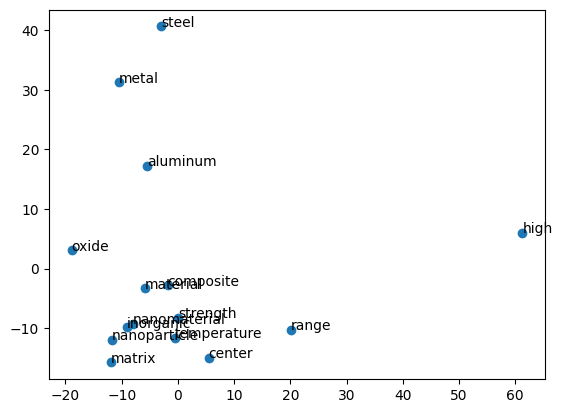

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

vocab = nlp(test_en)

words = [word.text for word in vocab]
vecs = np.vstack([word.vector for word in vocab if word.has_vector])
pca = PCA(n_components=2)
vecs_transformed = pca.fit_transform(vecs)

fig, ax = plt.subplots()
ax.scatter(vecs_transformed[:,0], vecs_transformed[:,1])

for i, (word, coord) in enumerate(zip(words, vecs_transformed)):
    ax.annotate(word, (vecs_transformed[:,0][i], vecs_transformed[:,1][i]))

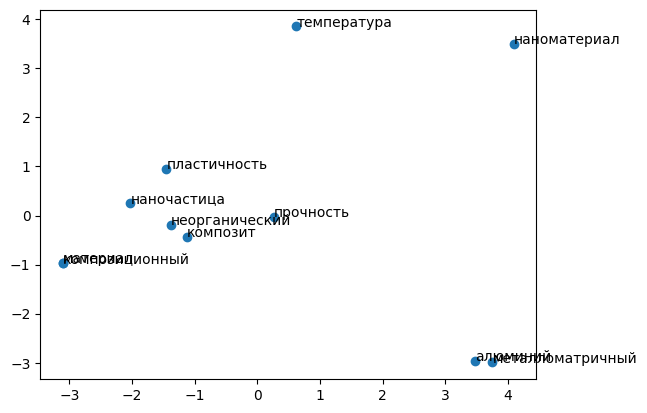

In [ ]:
vocab = nlp_ru(test_ru)

words = [word.text for word in vocab]
vecs = np.vstack([word.vector for word in vocab if word.has_vector])
pca = PCA(n_components=2)
vecs_transformed = pca.fit_transform(vecs)

fig, ax = plt.subplots()
ax.scatter(vecs_transformed[:,0], vecs_transformed[:,1])

for i, (word, coord) in enumerate(zip(words, vecs_transformed)):
    ax.annotate(word, (vecs_transformed[:,0][i], vecs_transformed[:,1][i]))

In [ ]:
test_ru_2 = 'имплантат рентгеновский бактерия облучение афк покрытие операция способный осложнение инфекция ticasicon антибактериальный вмешательство генерировать золотистый'

In [ ]:
test_en_2 = 'ray implant bacteria irradiation surgery coating afc complication infection generate antibacterial aureus coli film implantation'

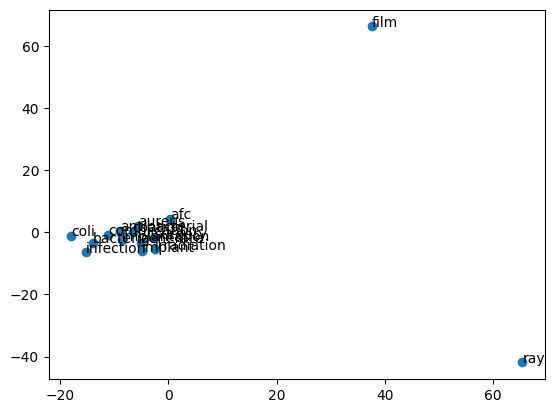

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

vocab = nlp(test_en_2)

words = [word.text for word in vocab]
vecs = np.vstack([word.vector for word in vocab if word.has_vector])
pca = PCA(n_components=2)
vecs_transformed = pca.fit_transform(vecs)

fig, ax = plt.subplots()
ax.scatter(vecs_transformed[:,0], vecs_transformed[:,1])

for i, (word, coord) in enumerate(zip(words, vecs_transformed)):
    ax.annotate(word, (vecs_transformed[:,0][i], vecs_transformed[:,1][i]))

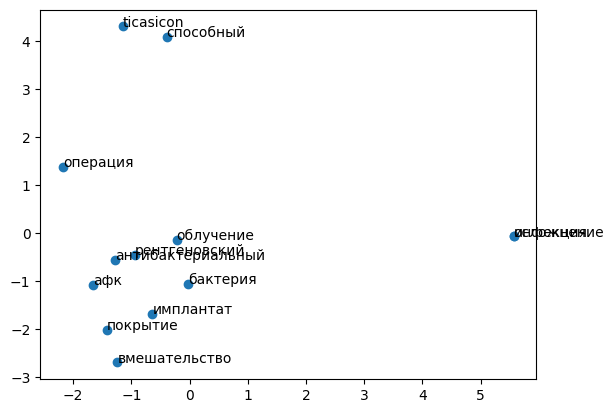

In [ ]:
vocab = nlp_ru(test_ru_2)

words = [word.text for word in vocab]
vecs = np.vstack([word.vector for word in vocab if word.has_vector])
pca = PCA(n_components=2)
vecs_transformed = pca.fit_transform(vecs)

fig, ax = plt.subplots()
ax.scatter(vecs_transformed[:,0], vecs_transformed[:,1])

for i, (word, coord) in enumerate(zip(words, vecs_transformed)):
    ax.annotate(word, (vecs_transformed[:,0][i], vecs_transformed[:,1][i]))